In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [4]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [32]:
df1.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type', 'availability', 'society'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

df3 = df2.dropna() 
df3.isnull().sum()

In [10]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [11]:
df3.shape

(12710, 6)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-13-d47496571a70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [15]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [23]:
df3[~df3['total_sqft'].apply(is_float)]
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [18]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df4 = df3.copy()

In [20]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [22]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
balcony           0.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [25]:
df4['total_sqft'].isnull().sum()

42

In [26]:
df4.isnull().sum()

location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [27]:
df4 = df4.dropna()

In [33]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [34]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [39]:
len(df5['location'].unique())

1259

In [44]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.location.value_counts(ascending = True)

In [45]:
location_stats

2nd phase jp nagar, jp nagar      1
Shirdi Sai Nagar                  1
Double Road                       1
Raja Rajashweri Nagar             1
Kamdhenu Nagar                    1
                               ... 
Thanisandra                     233
Kanakpura Road                  259
Electronic City                 302
Sarjapur  Road                  372
Whitefield                      514
Name: location, Length: 1248, dtype: int64

In [46]:
len(location_stats[location_stats <= 10])

1013

In [47]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

2nd phase jp nagar, jp nagar     1
Shirdi Sai Nagar                 1
Double Road                      1
Raja Rajashweri Nagar            1
Kamdhenu Nagar                   1
                                ..
Dairy Circle                    10
Ganga Nagar                     10
HAL 2nd Stage                   10
Doddaballapur                   10
Thyagaraja Nagar                10
Name: location, Length: 1013, dtype: int64

In [48]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

236

In [49]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [50]:
df5.shape

(12668, 8)

In [51]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12013, 8)

In [52]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [57]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - 1.5*st)) & (subdf.price_per_sqft <= (m + 1.5*st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(11064, 8)

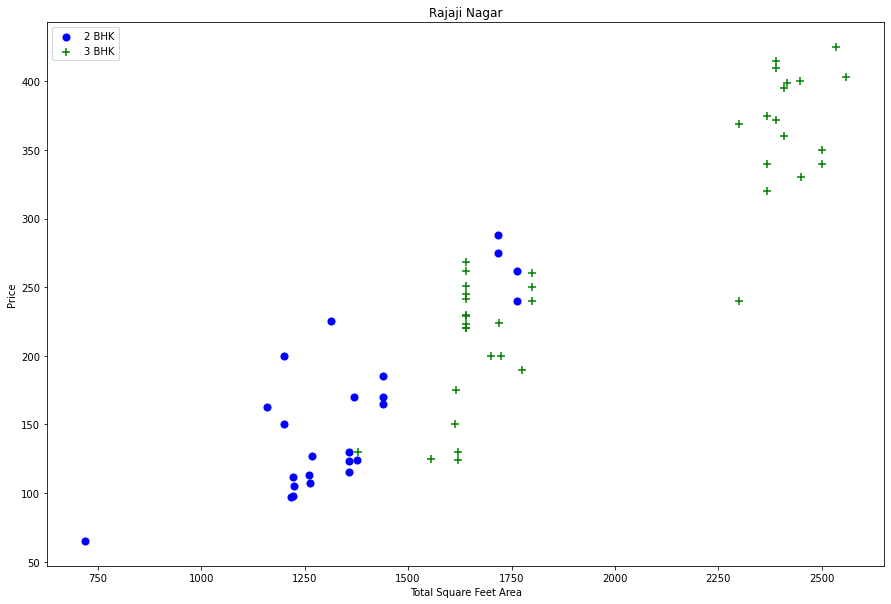

In [60]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, "Rajaji Nagar")

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7804, 8)

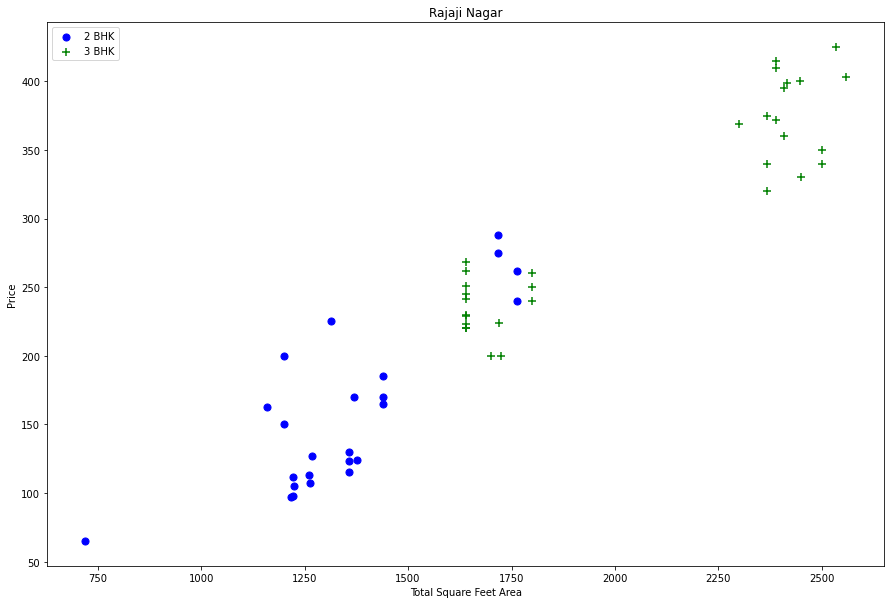

In [62]:
plot_scatter_chart(df8, "Rajaji Nagar")

Text(0, 0.5, 'Count')

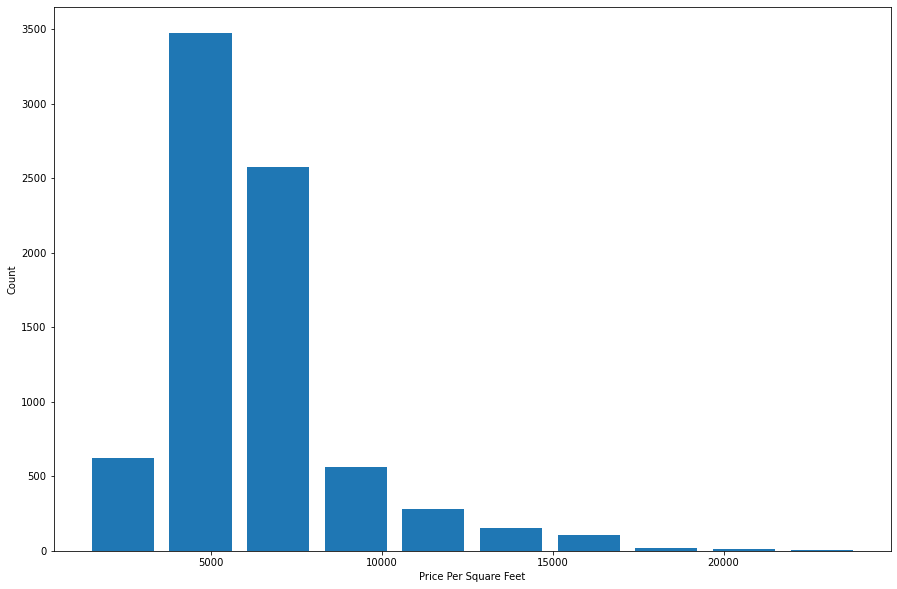

In [63]:
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [64]:
df8.bath.unique()

array([ 4.,  3.,  2.,  7.,  1.,  8.,  5.,  6.,  9., 10., 13.])

In [66]:
df8[df8.bath > 8]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
4122,KR Puram,9 BHK,4600.0,9.0,2.0,200.0,9,4347.826087
4169,Kadugodi,9 Bedroom,6200.0,9.0,0.0,200.0,9,3225.806452
5622,Mico Layout,9 BHK,5000.0,9.0,3.0,210.0,9,4200.000000
6224,Raja Rajeshwari Nagar,9 Bedroom,3600.0,9.0,3.0,240.0,9,6666.666667
7424,Thanisandra,8 Bedroom,3600.0,9.0,3.0,125.0,8,3472.222222
7851,Vidyaranyapura,9 BHK,4700.0,10.0,3.0,130.0,9,2765.957447
8843,other,11 BHK,5000.0,9.0,3.0,360.0,11,7200.000000
9224,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
9537,other,8 Bedroom,2400.0,9.0,3.0,350.0,8,14583.333333
10453,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [67]:
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1760,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
7450,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
9224,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [69]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7719, 8)

In [70]:
df9.balcony.unique()

array([1., 2., 3., 0.])

Text(0, 0.5, 'Count')

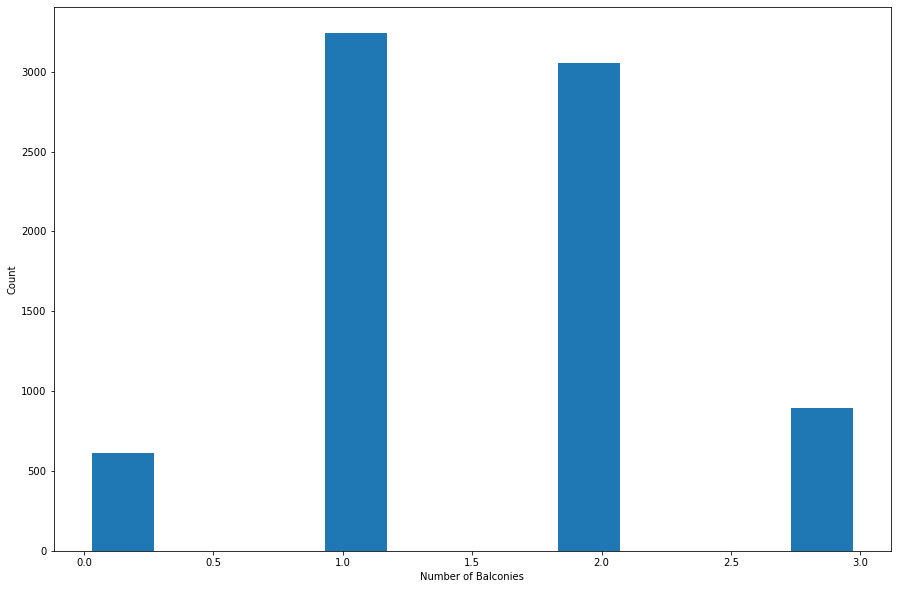

In [71]:
plt.hist(df8.balcony, rwidth = 0.8)
plt.xlabel("Number of Balconies")
plt.ylabel("Count")

In [107]:
df9[df9.balcony > df9.bhk]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft


In [111]:
df9 = df9[df9.balcony + 1 <= df9.bhk]
df9.shape

(5156, 8)

In [124]:
df9[df9.balcony == 3]
df9[df9.bhk == 1]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
225,8th Phase JP Nagar,1 BHK,451.0,1.0,0.0,29.90,1,6629.711752
285,9th Phase JP Nagar,1 BHK,600.0,1.0,0.0,20.00,1,3333.333333
320,Abbigere,1 BHK,734.0,1.0,0.0,19.82,1,2700.272480
541,Anjanapura,1 Bedroom,600.0,2.0,0.0,55.00,1,9166.666667
603,Attibele,1 BHK,782.0,1.0,0.0,19.55,1,2500.000000
...,...,...,...,...,...,...,...,...
10822,other,1 BHK,850.0,1.0,0.0,50.00,1,5882.352941
10882,other,1 Bedroom,540.0,1.0,0.0,22.00,1,4074.074074
10908,other,1 Bedroom,1675.0,1.0,0.0,241.00,1,14388.059701
10972,other,1 Bedroom,600.0,1.0,0.0,24.00,1,4000.000000


In [112]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = "columns")
df10.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4


In [113]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df11 = pd.concat([df10, dummies.drop('other', axis = 'columns')], axis = 'columns')
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df12 = df11.drop('location', axis = 'columns')
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,0.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,2.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
df12.shape

(5156, 238)

In [117]:
X = df12.drop('price', axis = 'columns')

In [118]:
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,0.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,2.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
y = df12.price
y.head()

0    428.0
1    194.0
3    130.0
5    413.0
6    368.0
Name: price, dtype: float64

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [121]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7810416471495958

In [122]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.80409868, 0.78334651, 0.76497635, 0.79296939, 0.76067553])

In [123]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.781213,{'normalize': False}
1,lasso,0.655608,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.635960,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [127]:
np.where(X.columns == '1st Phase JP Nagar')[0][0]

5

In [128]:
def predict_price(location, sqft, bath, balcony, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [138]:
predict_price('1st Phase JP Nagar', 1200, 3, 2, 3)

119.09839650814472

In [139]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_clf, f)

In [140]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))